In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Books/Data Mining/Project/insurance_claims.csv")

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
data.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [6]:
data = data.dropna()

In [7]:
data.shape

(909, 39)

# Seperating Numarical Data and Categorical Data into New DataFrames

In [8]:
num_data =  data.select_dtypes(include='number')

cat_data = data.select_dtypes(include='object')



In [9]:
num_data.shape

(909, 18)

In [10]:
cat_data.shape

(909, 21)

In [11]:
num_data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [12]:
cat_data.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

# Feature Selection using Chi-Square method

In [13]:
from scipy.stats import chi2_contingency

In [14]:

for categorical_var in ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']:
    contingency_table = pd.crosstab(cat_data[categorical_var], cat_data['fraud_reported'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared statistic for {categorical_var}: {chi2}, p-value: {p}")


Chi-squared statistic for policy_state: 1.3108192680215587, p-value: 0.5192293250268278
Chi-squared statistic for policy_csl: 1.2754851709934418, p-value: 0.528484086140152
Chi-squared statistic for insured_sex: 1.6336009302249002, p-value: 0.20120571189214695
Chi-squared statistic for insured_education_level: 2.0373622317555684, p-value: 0.9162305084550169
Chi-squared statistic for insured_occupation: 17.850883038560703, p-value: 0.16326386428924106
Chi-squared statistic for insured_hobbies: 142.66687915882625, p-value: 5.634558920096724e-21
Chi-squared statistic for insured_relationship: 4.528401363801563, p-value: 0.4760924500934369
Chi-squared statistic for incident_type: 11.490742047373042, p-value: 0.00934774544562435
Chi-squared statistic for collision_type: 13.644848842771035, p-value: 0.0034306846065696715
Chi-squared statistic for incident_severity: 235.63259327204923, p-value: 8.373783806184533e-51
Chi-squared statistic for authorities_contacted: 8.279562949020814, p-value: 

* If p value is less than 0.05, then we can conclude that there is a significant association with `fraud_reported`
* If p value is greater than 0.05, then we can conclude that there is a significant association with `fraud_reported`.

In [15]:
col_remove = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_hobbies', 'insured_occupation', 'incident_severity', 'insured_relationship', 'incident_city', 'incident_location', 'police_report_available', 'auto_make','auto_model']
cat_data.drop(col_remove, axis=1, inplace = True)

In [16]:
cat_data.shape

(909, 8)

In [17]:
cat_data.head()

,policy_bind_date,incident_date,incident_type,collision_type,authorities_contacted,incident_state,property_damage,fraud_reported
0,10/17/2014,1/25/2015,Single Vehicle Collision,Side Collision,Police,SC,YES,Y
1,6/27/2006,1/21/2015,Vehicle Theft,?,Police,VA,?,Y
2,9/6/2000,2/22/2015,Multi-vehicle Collision,Rear Collision,Police,NY,NO,N
3,5/25/1990,1/10/2015,Single Vehicle Collision,Front Collision,Police,OH,?,Y
5,10/12/2006,1/2/2015,Multi-vehicle Collision,Rear Collision,Fire,SC,NO,Y


In [18]:
col_remove = ['policy_bind_date','incident_date']
cat_data.drop(col_remove, axis =1, inplace = True)

In [19]:
cat_data.shape

(909, 6)

In [20]:
from sklearn.feature_selection import f_classif

In [21]:
X = num_data
y = data['fraud_reported']

# Calculate the ANOVA F-scores and p-values
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to store the results
anova_results = pd.DataFrame({'Feature': num_data.columns, 'F-Score': f_scores, 'p-value': p_values})

# Select numeric features with p-values below a significance level (e.g., 0.05)
selected_numeric_features = anova_results[anova_results['p-value'] <= 0.25]['Feature']

In [22]:
anova_results

,Feature,F-Score,p-value
0,months_as_customer,0.305334,0.580694
1,age,0.113267,0.736532
2,policy_number,0.610264,0.434892
3,policy_deductable,0.280817,0.596296
4,policy_annual_premium,0.240867,0.623699
5,umbrella_limit,3.769694,0.052499
6,insured_zip,0.477971,0.489520
7,capital-gains,0.377403,0.539150
8,capital-loss,0.291050,0.589681
9,incident_hour_of_the_day,0.266131,0.606065


In [23]:
selected_numeric_features

5         umbrella_limit
12             witnesses
13    total_claim_amount
14          injury_claim
15        property_claim
16         vehicle_claim
Name: Feature, dtype: object

In [24]:
num_data = num_data[selected_numeric_features]

In [25]:
num_data.shape

(909, 6)

# Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_mappings = {}

for column in cat_data.columns:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for column, mappings in label_mappings.items():
    print(f"Label mappings for {column}:")
    for category, label in mappings.items():
        print(f"{category}: {label}")


Label mappings for incident_type:
Multi-vehicle Collision: 0
Parked Car: 1
Single Vehicle Collision: 2
Vehicle Theft: 3
Label mappings for collision_type:
?: 0
Front Collision: 1
Rear Collision: 2
Side Collision: 3
Label mappings for authorities_contacted:
Ambulance: 0
Fire: 1
Other: 2
Police: 3
Label mappings for incident_state:
NC: 0
NY: 1
OH: 2
PA: 3
SC: 4
VA: 5
WV: 6
Label mappings for property_damage:
?: 0
NO: 1
YES: 2
Label mappings for fraud_reported:
N: 0
Y: 1


In [27]:
cat_data.head()

,incident_type,collision_type,authorities_contacted,incident_state,property_damage,fraud_reported
0,2,3,3,4,2,1
1,3,0,3,5,0,1
2,0,2,3,1,1,0
3,2,1,3,2,0,1
5,0,2,1,4,1,1


In [28]:
combined_data = pd.concat([num_data, cat_data], axis=1)

In [29]:
combined_data.shape

(909, 12)

# Model Training
We are going to perform:
1. Affinity Propagation
2. KNN
3. XGBoost
4. Decision Tree

# 1. Affinity Propagation

In [30]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score 

# Assuming 'combined_data' contains your combined data and 'fraud_reported' is your target variable
X = combined_data
y = combined_data['fraud_reported']

# Create an Affinity Propagation model
model_ap = AffinityPropagation()

# Fit the model to your data
model_ap.fit(X)

# Get cluster assignments
cluster_labels = model_ap.labels_

# Evaluate the clustering using a clustering metric, such as silhouette score
silhouette_score = silhouette_score(X, cluster_labels)
davies_bouldin = davies_bouldin_score(X, cluster_labels)

print(f"Silhouette Score: {silhouette_score}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.3115962728777982
Davies-Bouldin Index: 0.34884672610517


C:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Silhouette Score (0.3659):
1. Measures the quality of clusters produced by a clustering algorithm.
2. Ranges from -1 to 1.
3. A score close to 1 indicates well-separated and distinguishable clusters.
4. A score close to 0 suggests overlapping clusters.
5. The score of 0.3659 indicates that the clusters are somewhat distinguishable but not perfectly separated.

Davies-Bouldin Index (0.6046):
1. Measures the average similarity between clusters and their most similar neighbor cluster.
2. Lower values are better, indicating more distinct clusters.
3. A lower index suggests better cluster separation.
4. The index of 0.6046 is below 1, indicating moderate cluster separation.
proved results.eparation.

# Splitting data into train, test

In [31]:
from sklearn.model_selection import train_test_split

X = combined_data.drop(columns=['fraud_reported'])
y = combined_data['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2. K-Nearest Neighbors (KNN) Algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)

accuracy_knn = accuracy_score(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_prob)
mae_knn = mean_absolute_error(y_test, y_pred)
mse_knn = mean_squared_error(y_test, y_pred)
classification_rep_knn = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_knn}")
print("Classification Report:\n", classification_rep_knn)
print(f"ROC AUC: {roc_auc_knn}")
print(f"MAE: {mae_knn}")
print(f"MSE: {mse_knn}")

Accuracy: 0.6373626373626373
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77       128
           1       0.17      0.06      0.08        54

    accuracy                           0.64       182
   macro avg       0.43      0.47      0.43       182
weighted avg       0.53      0.64      0.57       182

ROC AUC: 0.48900462962962954
MAE: 0.3626373626373626
MSE: 0.3626373626373626


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score
import numpy as np

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate accuracy for classification
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Calculate MAE (Mean Absolute Error) for classification
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# Calculate MSE (Mean Squared Error) for classification
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Calculate ROC AUC (Receiver Operating Characteristic Area Under Curve)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

Accuracy: 0.6373626373626373
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77       128
           1       0.17      0.06      0.08        54

    accuracy                           0.64       182
   macro avg       0.43      0.47      0.43       182
weighted avg       0.53      0.64      0.57       182

MAE: 0.3626373626373626
MSE: 0.3626373626373626
ROC AUC: 0.48900462962962954


# 3. XGBoost

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score

# Create and train the XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate accuracy for classification
accuracy_xg = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_xg}")

# Calculate classification report
classification_rep_xg = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep_xg)

# Calculate MAE (Mean Absolute Error) for classification
mae_xg = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae_xg}")

# Calculate MSE (Mean Squared Error) for classification
mse_xg = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_xg}")

# Calculate ROC AUC (Receiver Operating Characteristic Area Under Curve)
roc_auc_xg = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc_xg}")



Accuracy: 0.6483516483516484
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76       128
           1       0.37      0.26      0.30        54

    accuracy                           0.65       182
   macro avg       0.55      0.54      0.53       182
weighted avg       0.62      0.65      0.63       182

MAE: 0.3516483516483517
MSE: 0.3516483516483517
ROC AUC: 0.5541087962962962


In [35]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(xgb, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Print the accuracy scores for each fold
for i, score in enumerate(scores):
    print(f"Fold {i + 1} Accuracy: {score}")

# Calculate the mean and standard deviation of the scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")

Fold 1 Accuracy: 0.7054794520547946
Fold 2 Accuracy: 0.6506849315068494
Fold 3 Accuracy: 0.6413793103448275
Fold 4 Accuracy: 0.6689655172413793
Fold 5 Accuracy: 0.7172413793103448
Mean Accuracy: 0.6767501180916391
Standard Deviation: 0.02985298935720727


# 4. Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)
y_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate accuracy for classification
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt}")

# Calculate classification report
classification_rep_dt = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep_dt)

# Calculate MAE (Mean Absolute Error) for classification
mae_dt = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae_dt}")

# Calculate MSE (Mean Squared Error) for classification
mse_dt = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_dt}")

# Calculate ROC AUC (Receiver Operating Characteristic Area Under Curve)
roc_auc_dt = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc_dt}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

Accuracy: 0.6263736263736264
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       128
           1       0.37      0.37      0.37        54

    accuracy                           0.63       182
   macro avg       0.55      0.55      0.55       182
weighted avg       0.63      0.63      0.63       182

MAE: 0.37362637362637363
MSE: 0.37362637362637363
ROC AUC: 0.5523726851851851


In [37]:
from sklearn.model_selection import GridSearchCV  
  
params_grid = {  
    'criterion' : ['gini', 'entropy'],  
    'max_depth' : [3, 5, 7, 10],  
    'min_samples_split' : range(2, 10, 1),  
    'min_samples_leaf' : range(2, 10, 1)  
}  
  
search_grid = GridSearchCV(dt_classifier, params_grid, cv = 5, n_jobs = -1, verbose = 1)  
search_grid.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [38]:
# best parameters and the best score  
  
print(search_grid.best_params_)  
print(search_grid.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.7469248937175248


In [39]:
# Best estimator
dt = search_grid.best_estimator_

y_pred = dt.predict(X_test)

# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy scores
acc_dt_train = accuracy_score(y_train, dt.predict(X_train))
acc_dt_test = accuracy_score(y_test, y_pred)

# Print accuracy scores
print(f"Training accuracy of Decision Tree is: {acc_dt_train}")
print(f"Test accuracy of Decision Tree is: {acc_dt_test}")

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))


Training accuracy of Decision Tree is: 0.7537826685006878
Test accuracy of Decision Tree is: 0.6978021978021978
[[125   3]
 [ 52   2]]
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       128
           1       0.40      0.04      0.07        54

    accuracy                           0.70       182
   macro avg       0.55      0.51      0.44       182
weighted avg       0.62      0.70      0.60       182



In [40]:
# # histograms
# #pyod
# roc 
# mae
# mse
# accuracy
# precision'recall f1
# pickle to save best model
# deploy in streamlit or pannel

In [41]:
from pyod.models.knn import KNN
from pyod.models.xgbod import XGBOD
# from pyod.models.decision_tree import DecisionTree
from pyod.utils.data import evaluate_print

# Create and train the KNN model from PyOD
knn_model = KNN(n_neighbors=5)
knn_model.fit(X_train,y_train)

# Create and train the XGBOD model from PyOD
xgbod_model = XGBOD()
xgbod_model.fit(X_train,y_train)

# Create and train the Decision Tree model from PyOD
# dt_model = DecisionTree()
# dt_model.fit(X_train)


# Predict outliers on the test set for each model
knn_y_pred = knn_model.predict(X_test)
xgbod_y_pred = xgbod_model.predict(X_test)
# dt_y_pred = dt_model.predict(X_test)

# Evaluate and print the results for each model
print("KNN Model:")
evaluate_print("KNN", y_test, knn_y_pred)

print("\nXGBOD Model:")
evaluate_print("XGBOD", y_test, xgbod_y_pred)

# print("\Decision Tree Model:")
# evaluate_print("Decision Tree Model", y_test, dt_y_pred)


C:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:56:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


KNN Model:
KNN ROC:0.5019, precision @ rank n:0.3077

XGBOD Model:
XGBOD ROC:0.4727, precision @ rank n:0.0


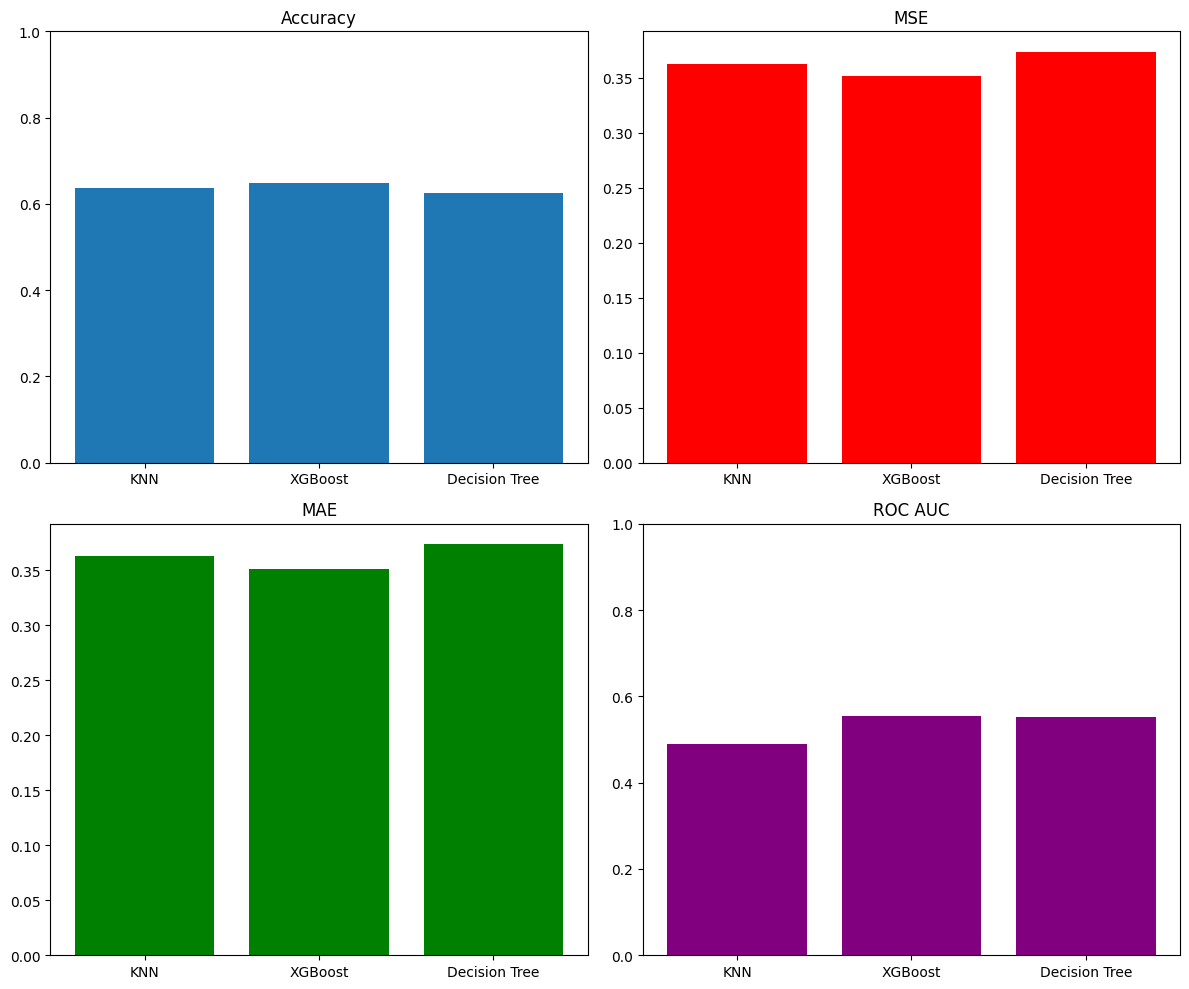

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding metric scores
models = ['KNN', 'XGBoost', 'Decision Tree']
metrics = ['Accuracy', 'MSE', 'MAE', 'ROC AUC']

# Replace the following lists with your actual metric scores for each model
# For example, create lists like accuracy_scores, mse_scores, etc.
accuracy_scores = [accuracy_knn, accuracy_xg, accuracy_dt]  # Replace with actual accuracy scores
mse_scores = [mse_knn, mse_xg, mse_dt]  # Replace with actual MSE scores
mae_scores = [mae_knn, mae_xg, mae_dt]  # Replace with actual MAE scores
roc_auc_scores = [roc_auc_knn, roc_auc_xg, roc_auc_dt]  # Replace with actual ROC AUC scores

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot accuracy
axs[0, 0].bar(models, accuracy_scores)
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 1)

# Plot MSE
axs[0, 1].bar(models, mse_scores, color='red')
axs[0, 1].set_title('MSE')

# Plot MAE
axs[1, 0].bar(models, mae_scores, color='green')
axs[1, 0].set_title('MAE')

# Plot ROC AUC
axs[1, 1].bar(models, roc_auc_scores, color='purple')
axs[1, 1].set_title('ROC AUC')
axs[1, 1].set_ylim(0, 1)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
